# Fetch Housing Data

In [1]:
import pandas as pd
import numpy as np
import os
import CH_02_Fetch_Housing_Data as hdmodule

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
hdmodule.fetch_housing_data()

path already exists, continue...



In [3]:
housing = hdmodule.load_housing_data()

# Playing With Data

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.size

206400

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing["total_rooms"].value_counts()

1527.0     18
1613.0     17
1582.0     17
2127.0     16
1703.0     15
1471.0     15
2053.0     15
1722.0     15
1607.0     15
1717.0     15
1787.0     14
1705.0     14
1743.0     14
1650.0     14
1880.0     14
1731.0     14
1745.0     14
1724.0     14
1562.0     14
1808.0     13
1999.0     13
1551.0     13
1748.0     13
1649.0     13
1701.0     13
1462.0     13
1621.0     13
2017.0     13
1619.0     13
2228.0     13
           ..
738.0       1
4925.0      1
4887.0      1
3641.0      1
6349.0      1
5735.0      1
6106.0      1
5470.0      1
5409.0      1
13796.0     1
5807.0      1
7517.0      1
8069.0      1
6748.0      1
11965.0     1
6875.0      1
3992.0      1
951.0       1
6128.0      1
16759.0     1
3967.0      1
5002.0      1
225.0       1
4755.0      1
6617.0      1
7784.0      1
7916.0      1
6859.0      1
6846.0      1
5639.0      1
Name: total_rooms, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Let's Plot Them All

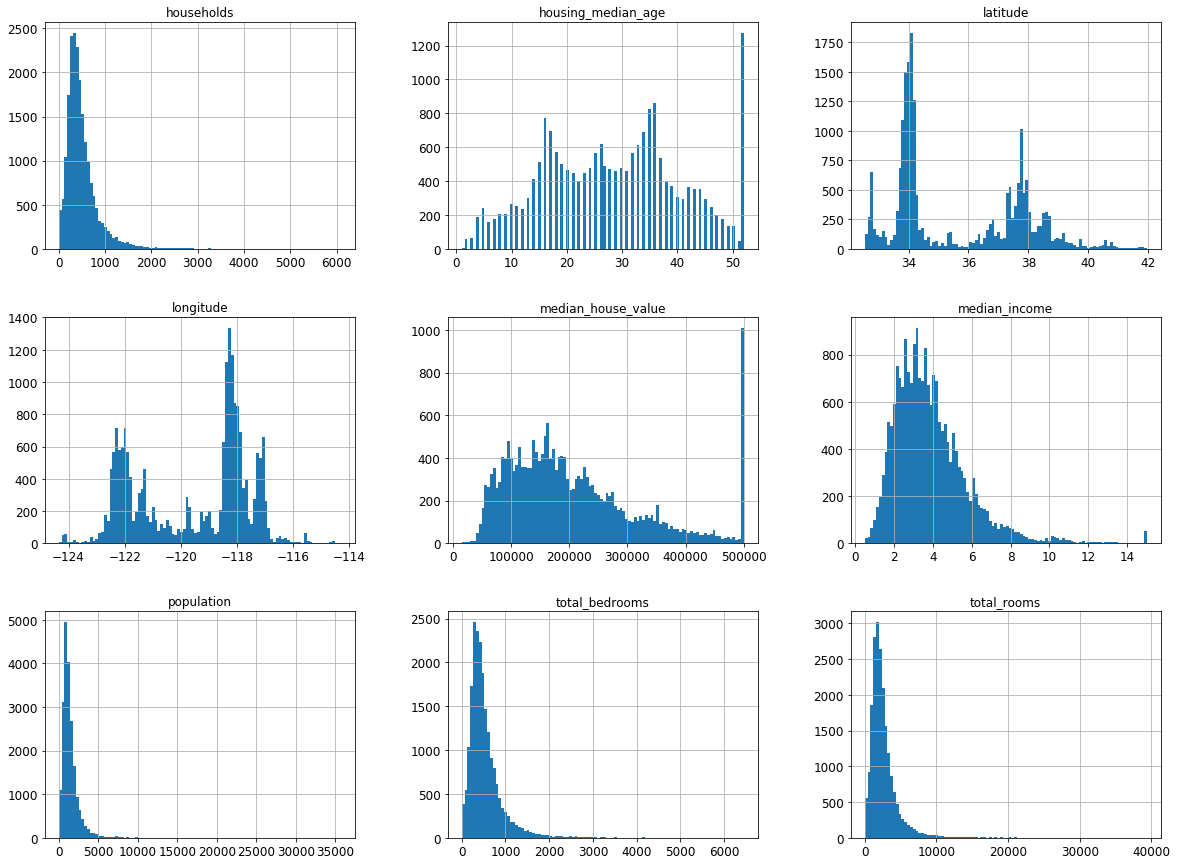

In [10]:
# only in jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins= 100, figsize= (20,15))
plt.show() # Optional Call

In [16]:
# Good for large Sample sizes
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#*******************************************************************
# Stratified Sampling
#*******************************************************************

housing["income_cat"] = np.ceil(housing["median_income"] /1.5)
# See < 5 actually means if any thing is greater than 5, set it to 5.0
housing["income_cat"].where(housing["income_cat"] < 5 , 5.0, inplace = True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 3, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


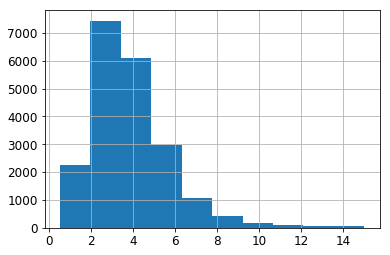

In [17]:
housing["median_income"].hist()

In [18]:
t1 = housing["income_cat"].value_counts() / len(housing)
t2 = strat_train_set["income_cat"].value_counts()/len(strat_train_set)
t3 = train_set["income_cat"].value_counts()/len(train_set)

In [19]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [20]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [21]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [22]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7175,-118.19,34.05,47.0,1273.0,264.0,1193.0,260.0,2.4375,122900.0,<1H OCEAN
14713,-117.04,32.80,25.0,2504.0,345.0,1067.0,350.0,5.7416,243400.0,<1H OCEAN
9730,-121.74,36.79,16.0,3841.0,620.0,1799.0,611.0,4.3814,245300.0,<1H OCEAN
11269,-118.00,33.79,18.0,3679.0,694.0,1820.0,652.0,3.6531,143500.0,<1H OCEAN
10738,-117.91,33.60,37.0,2088.0,510.0,673.0,390.0,5.1048,500001.0,<1H OCEAN


# Discover and visualize the data to gain insights

In [23]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


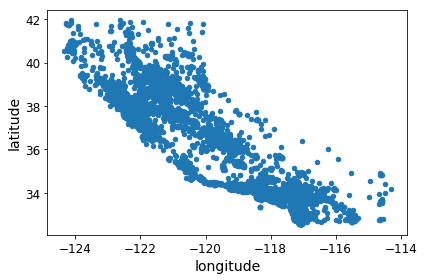

In [24]:
housing.plot.scatter(x = "longitude", y = "latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


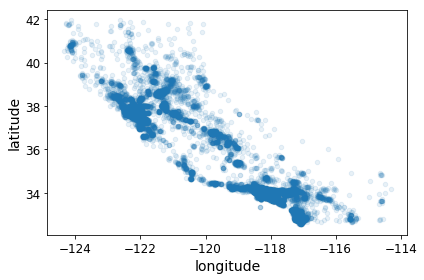

In [25]:
housing.plot.scatter(x = "longitude", y = "latitude", alpha = 0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


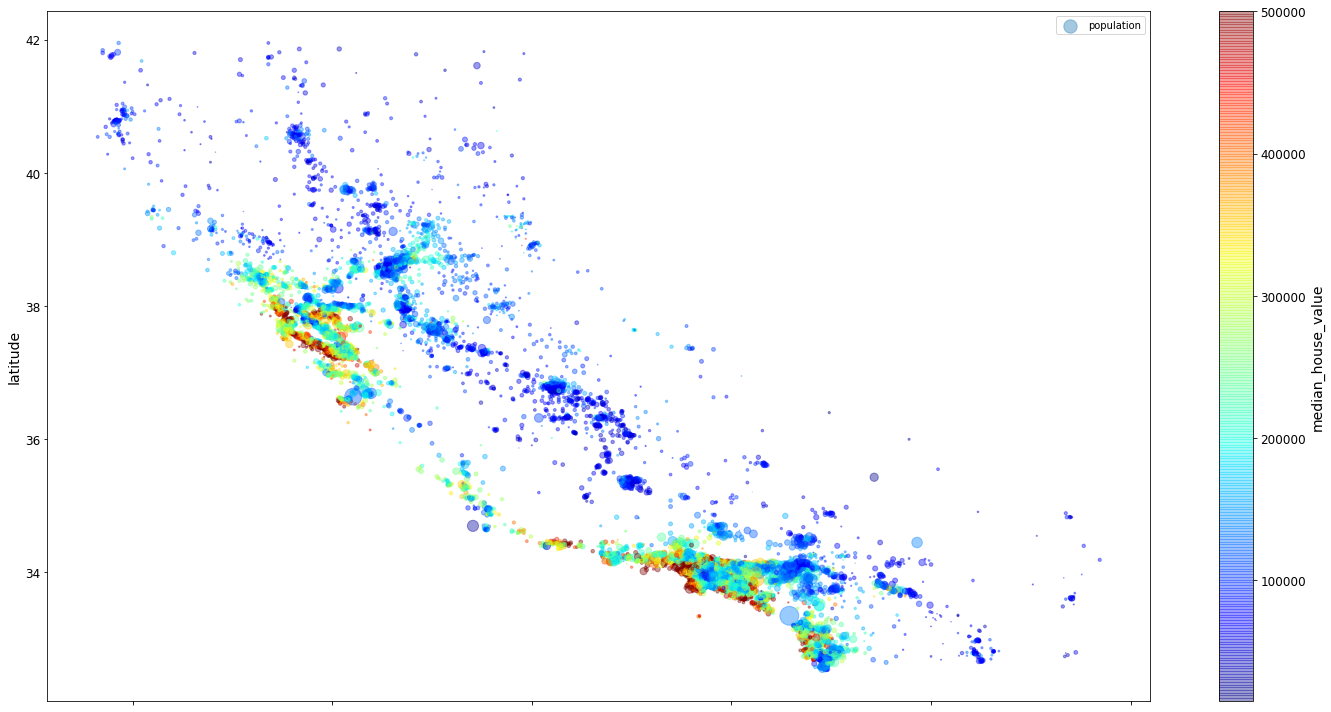

In [26]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(20,10)
)
plt.legend()
save_fig("housing_prices_scatterplot")
plt.show()

Saving figure california_housing_prices_plot


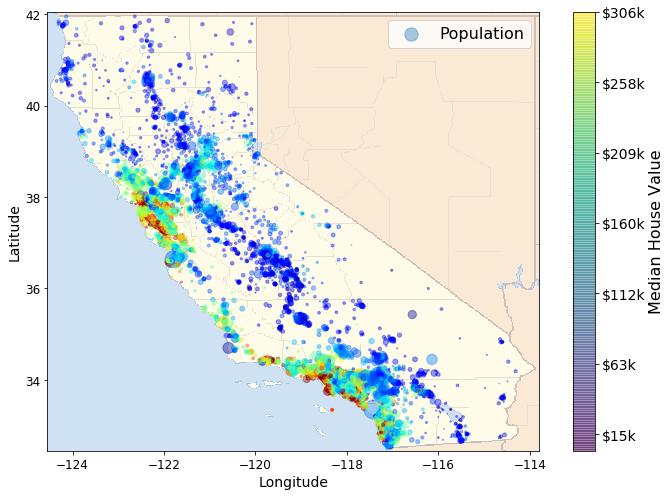

In [27]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [28]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924334,-0.110272,0.042749,0.067685,0.096795,0.053128,-0.017326,-0.051430
latitude,-0.924334,1.000000,0.012675,-0.034193,-0.065774,-0.107380,-0.069838,-0.076598,-0.138752
housing_median_age,-0.110272,0.012675,1.000000,-0.356774,-0.314011,-0.288190,-0.295866,-0.115870,0.107339
total_rooms,0.042749,-0.034193,-0.356774,1.000000,0.929925,0.853461,0.917648,0.190096,0.132101
total_bedrooms,0.067685,-0.065774,-0.314011,0.929925,1.000000,0.875026,0.979486,-0.016840,0.048133
population,0.096795,-0.107380,-0.288190,0.853461,0.875026,1.000000,0.904944,-0.002230,-0.024427
households,0.053128,-0.069838,-0.295866,0.917648,0.979486,0.904944,1.000000,0.004610,0.065186
median_income,-0.017326,-0.076598,-0.115870,0.190096,-0.016840,-0.002230,0.004610,1.000000,0.686993
median_house_value,-0.051430,-0.138752,0.107339,0.132101,0.048133,-0.024427,0.065186,0.686993,1.000000


In [29]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.686993
total_rooms           0.132101
housing_median_age    0.107339
households            0.065186
total_bedrooms        0.048133
population           -0.024427
longitude            -0.051430
latitude             -0.138752
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007D901BD278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000007D8F4EAFD0>]], dtype=object)

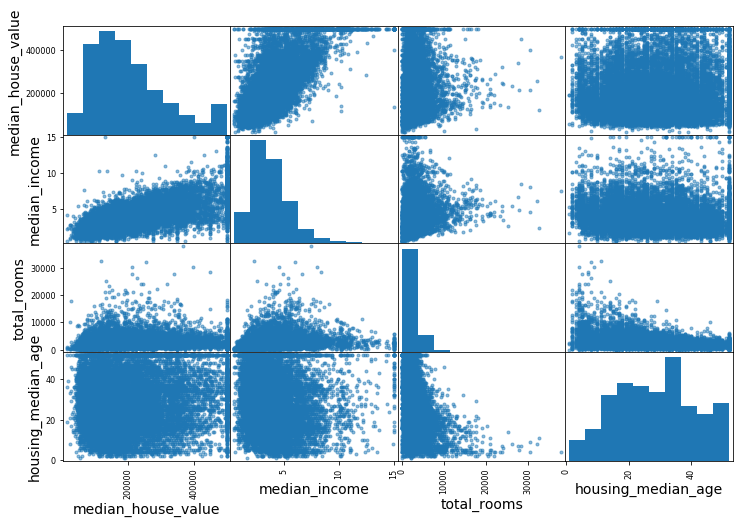

In [30]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
             "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize= (12,8))

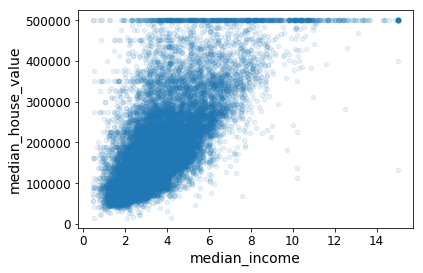

In [31]:
housing.plot.scatter(x="median_income", y="median_house_value",
alpha = 0.1)

In [32]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)


median_house_value          1.000000
median_income               0.686993
rooms_per_household         0.145383
total_rooms                 0.132101
housing_median_age          0.107339
households                  0.065186
total_bedrooms              0.048133
population_per_household   -0.022330
population                 -0.024427
longitude                  -0.051430
latitude                   -0.138752
bedrooms_per_room          -0.252951
Name: median_house_value, dtype: float64

# Prepare the data for Machine Learning algorithms

In [34]:
housing = strat_train_set.drop("median_house_value", axis= 1)

housing_labels = strat_train_set["median_house_value"].copy()

In [35]:
#**********************************************************
# Data Cleaning Techniques
#**********************************************************

# housing.dropna(subset= ["total_bedrooms"]) # Option 1
# housing.drop("total_bedrooms", axis=1) # option 2
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median) # option 3

In [36]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [37]:
imputer.statistics_

array([ -118.48  ,    34.25  ,    29.    ,  2123.    ,   433.    ,
        1163.    ,   409.    ,     3.5313])

In [38]:
imputer.strategy

'median'

In [39]:
housing_num.median().values

array([ -118.48  ,    34.25  ,    29.    ,  2123.    ,   433.    ,
        1163.    ,   409.    ,     3.5313])

In [40]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.iloc[21:24]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
21,-118.45,34.22,24.0,3442.0,1168.0,4625.0,1097.0,2.0699
22,-119.77,36.75,39.0,1287.0,332.0,1386.0,306.0,1.5227
23,-122.29,37.86,52.0,1665.0,404.0,815.0,372.0,1.9946


In [41]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.19,34.05,47.0,1273.0,264.0,1193.0,260.0,2.4375
1,-117.04,32.80,25.0,2504.0,345.0,1067.0,350.0,5.7416
2,-121.74,36.79,16.0,3841.0,620.0,1799.0,611.0,4.3814
3,-118.00,33.79,18.0,3679.0,694.0,1820.0,652.0,3.6531
4,-117.91,33.60,37.0,2088.0,510.0,673.0,390.0,5.1048


## Label Encoder

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 0, ..., 4, 0, 4], dtype=int64)

In [43]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


## One-Hot encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

housing_cat_1hot

In [45]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Label Binarizer

In [46]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

## custom Transformers

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

In [48]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit (self, X,y = None):
        return self # Nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


## Transformation Pipelines

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [50]:
housing_num_tr

array([[ 0.68438443, -0.73802922,  1.46449844, ..., -0.20975979,
         0.13040452, -0.09703835],
       [ 1.25829536, -1.32367842, -0.28840047, ...,  0.667978  ,
        -0.00388023, -1.20620215],
       [-1.08725365,  0.54571383, -1.00549548, ...,  0.33063619,
        -0.01296846, -0.82954558],
       ..., 
       [-1.4465718 ,  0.98143683,  1.46449844, ..., -0.43437373,
        -0.00396328,  0.19592855],
       [ 0.58956436, -0.81767751,  0.82708065, ...,  0.03071426,
        -0.0297554 , -0.38379698],
       [ 1.22336165, -1.34241919,  0.03030842, ..., -0.58961185,
        -0.09902363,  0.87642428]])

In [51]:
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
])
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
])

In [52]:
housing_prepared = full_pipeline.fit_transform(housing)

In [53]:
housing_prepared

array([[ 0.68438443, -0.73802922,  1.46449844, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25829536, -1.32367842, -0.28840047, ...,  0.        ,
         0.        ,  0.        ],
       [-1.08725365,  0.54571383, -1.00549548, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-1.4465718 ,  0.98143683,  1.46449844, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58956436, -0.81767751,  0.82708065, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22336165, -1.34241919,  0.03030842, ...,  0.        ,
         0.        ,  1.        ]])

In [55]:
housing_prepared.shape

(16512, 16)

In [56]:
housing_prepared.itemsize

8

# Select and Train a Model

In [59]:
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Try out it on training set

In [73]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [74]:
print("predictions : \t" , line_reg.predict(some_data_prepared))

predictions : 	 [ 158590.87046065  277673.97742927  246965.09146555  203334.52610017
  305403.12538595]


In [75]:
print("labels : \t" , list(some_labels))

labels : 	 [122900.0, 243400.0, 245300.0, 143500.0, 500001.0]


In [81]:
from sklearn.metrics import mean_squared_error
housing_predictons = line_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictons)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #68093.672707756676 underfitting Example

68093.672707756676

### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictons = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictons)
tree_rmse = np.sqrt(tree_mse)

In [89]:
tree_rmse # Over-fitting ????

0.0

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = "neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)
rmse_scores

array([ 72605.23049731,  70955.44545266,  74110.93190968,  70945.78144916,
        70032.19863718,  68595.56926039,  67784.53732837,  71100.14585136,
        69705.07935312,  66443.57697816])

In [118]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std Dev: ", scores.std())

In [119]:
display_scores(rmse_scores)

Scores:  [ 72605.23049731  70955.44545266  74110.93190968  70945.78144916
  70032.19863718  68595.56926039  67784.53732837  71100.14585136
  69705.07935312  66443.57697816]
Mean:  70227.8496717
Std Dev:  2140.14934152


### RandomForestRegressor

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)

housing_predictons_forest = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictons_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22327.701834016327

In [129]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg,housing_prepared,
                               housing_labels,
                               scoring="neg_mean_squared_error",
                                cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse)

Scores:  22327.701834
Mean:  22327.701834
Std Dev:  0.0


In [131]:
scores = cross_val_score(line_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68339.187188
std       2243.633580
min      65134.034236
25%      67171.432275
50%      68468.830613
75%      69231.029496
max      73107.508811
dtype: float64

### SVR

In [132]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110349.5765241815

### Grid Search CV

In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [134]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [135]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [136]:
cvres = grid_search.cv_results_

In [137]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64696.5283706 {'max_features': 2, 'n_estimators': 3}
55523.5859805 {'max_features': 2, 'n_estimators': 10}
52338.0613832 {'max_features': 2, 'n_estimators': 30}
59483.3166748 {'max_features': 4, 'n_estimators': 3}
52583.1873534 {'max_features': 4, 'n_estimators': 10}
50083.1193356 {'max_features': 4, 'n_estimators': 30}
59246.3309863 {'max_features': 6, 'n_estimators': 3}
51924.1610559 {'max_features': 6, 'n_estimators': 10}
49659.9744062 {'max_features': 6, 'n_estimators': 30}
58535.3886356 {'max_features': 8, 'n_estimators': 3}
51809.2300928 {'max_features': 8, 'n_estimators': 10}
49849.6252481 {'max_features': 8, 'n_estimators': 30}
62087.3663013 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54007.8744123 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59902.1182621 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51996.554626 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59468.0340158 {'bootstrap': False, 'max_features': 4, 'n_estima

In [138]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.078656,0.004003,-4.185641e+09,-1.118512e+09,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",18,-4.032329e+09,...,-4.072364e+09,-1.094298e+09,-4.227493e+09,-1.102730e+09,-4.366624e+09,-1.154175e+09,0.007288,0.000633,1.206306e+08,2.313387e+07
1,0.226773,0.010805,-3.082869e+09,-5.709529e+08,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",11,-3.172803e+09,...,-3.103519e+09,-5.763988e+08,-3.031616e+09,-5.826719e+08,-3.112861e+09,-5.672245e+08,0.012437,0.000748,6.328102e+07,7.825565e+06
2,0.665473,0.028420,-2.739273e+09,-4.237502e+08,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",8,-2.887689e+09,...,-2.646379e+09,-4.267432e+08,-2.729651e+09,-4.173524e+08,-2.755783e+09,-4.273608e+08,0.025209,0.001020,8.357494e+07,3.788547e+06
3,0.114288,0.003806,-3.538265e+09,-9.606324e+08,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",15,-3.555682e+09,...,-3.419384e+09,-9.824195e+08,-3.446670e+09,-9.460200e+08,-3.699195e+09,-9.681550e+08,0.004264,0.000402,9.974961e+07,1.810061e+07
4,0.353855,0.010606,-2.764992e+09,-5.255670e+08,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",9,-2.950837e+09,...,-2.747149e+09,-5.548990e+08,-2.677669e+09,-5.097212e+08,-2.718847e+09,-5.103407e+08,0.021257,0.001202,9.572117e+07,1.797874e+07
5,1.035545,0.027216,-2.508319e+09,-3.858297e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-2.580750e+09,...,-2.406028e+09,-3.968166e+08,-2.496425e+09,-3.833301e+08,-2.588920e+09,-3.811759e+08,0.046491,0.000745,6.907487e+07,5.769337e+06
6,0.148295,0.003806,-3.510128e+09,-9.184172e+08,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",13,-3.528367e+09,...,-3.361770e+09,-9.115681e+08,-3.506411e+09,-9.183647e+08,-3.565793e+09,-8.858735e+08,0.006433,0.000745,7.944707e+07,2.166390e+07
7,0.473750,0.010808,-2.696119e+09,-5.068558e+08,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",6,-2.755135e+09,...,-2.515272e+09,-4.928606e+08,-2.654572e+09,-5.042994e+08,-2.831636e+09,-5.253418e+08,0.007675,0.002137,1.068164e+08,1.062754e+07
8,1.395013,0.027614,-2.466113e+09,-3.814349e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",1,-2.519305e+09,...,-2.360771e+09,-3.907394e+08,-2.422297e+09,-3.665658e+08,-2.599272e+09,-3.865812e+08,0.021710,0.001012,8.361608e+07,8.259862e+06
9,0.188542,0.003599,-3.426392e+09,-9.038823e+08,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",12,-3.651026e+09,...,-3.242115e+09,-9.594466e+08,-3.490106e+09,-8.943022e+08,-3.352680e+09,-8.721420e+08,0.008273,0.000488,1.377248e+08,2.929864e+07


### Randomized Search CV

In [141]:
from sklearn.model_selection import RandomizedSearchCV
import scipy
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000007D90018208>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000007D900183C8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [142]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52700.9090318 {'max_features': 6, 'n_estimators': 8}
52987.268469 {'max_features': 5, 'n_estimators': 8}
50181.2761495 {'max_features': 4, 'n_estimators': 33}
51686.2342074 {'max_features': 2, 'n_estimators': 79}
48878.4378503 {'max_features': 6, 'n_estimators': 157}
49201.1042694 {'max_features': 4, 'n_estimators': 115}
49202.5827892 {'max_features': 5, 'n_estimators': 55}
56001.6048714 {'max_features': 7, 'n_estimators': 4}
49096.3163533 {'max_features': 4, 'n_estimators': 177}
54493.0125687 {'max_features': 1, 'n_estimators': 74}


In [143]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([ 0.07508776,  0.07123379,  0.04012445,  0.01981476,  0.01688371,
        0.01770596,  0.01661207,  0.32309281,  0.06089251,  0.11136637,
        0.07969508,  0.01266891,  0.1453222 ,  0.00037504,  0.00296509,
        0.00615949])

In [144]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32309281003678125, 'median_income'),
 (0.1453222021084889, 'INLAND'),
 (0.11136636818658183, 'population_per_household'),
 (0.079695075303740509, 'bedrooms_per_room'),
 (0.075087764327437939, 'longitude'),
 (0.071233786902485371, 'latitude'),
 (0.060892512581059696, 'rooms_per_household'),
 (0.040124453014177767, 'housing_median_age'),
 (0.019814756318128821, 'total_rooms'),
 (0.01770595586954329, 'population'),
 (0.016883710926625169, 'total_bedrooms'),
 (0.016612066693839182, 'households'),
 (0.012668912619349859, '<1H OCEAN'),
 (0.0061594944839580851, 'NEAR OCEAN'),
 (0.0029650858069363234, 'NEAR BAY'),
 (0.00037504482086605996, 'ISLAND')]

In [146]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_transformed = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_transformed)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

50188.880412918406

# Other material

## ## Label Binarizer hack
`LabelBinarizer`'s `fit_transform()` method only accepts one parameter `y` (because it was meant for labels, not predictors), so it does not work in a pipeline where the final estimator is a supervised estimator because in this case its `fit()` method takes two parameters `X` and `y`.

This hack creates a supervision-friendly `LabelBinarizer`.

In [149]:
class SupervisionFriendlyLabelBinarizer(LabelBinarizer):
    def fit_transform(self, X, y=None):
        return super(SupervisionFriendlyLabelBinarizer, self).fit_transform(X)

# Replace the Labelbinarizer with a SupervisionFriendlyLabelBinarizer
cat_pipeline.steps[1] = ("label_binarizer", SupervisionFriendlyLabelBinarizer())

# Now you can create a full pipeline with a supervised predictor at the end.
full_pipeline = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline.fit(housing, housing_labels)
full_pipeline.predict(some_data)

array([ 158590.87046065,  277673.97742927,  246965.09146555,
        203334.52610017,  305403.12538595])

## Model persistence using joblib

In [150]:
from sklearn.externals import joblib

joblib.dump(final_model, "my_random_forest_regressor.pkl")

['my_random_forest_regressor.pkl']

In [151]:
final_model_loaded = joblib.load("my_random_forest_regressor.pkl")
final_model_loaded

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Example SciPy distributions for `RandomizedSearchCV`

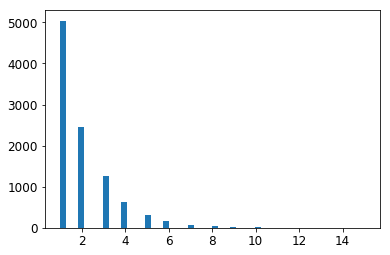

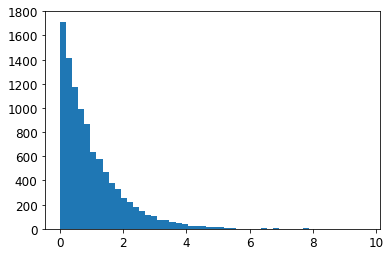

In [152]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000)
expon_distrib=expon(scale=1).rvs(10000)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise from book

## Try a Support Vector Machine regressor

In [156]:
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg,param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)

grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 23.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 37.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]}, {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

In [157]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

69597.013534943035